# Census Income Data Set

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

# '?' Found and needs treating

In [8]:
df[df.isin(['?']).any(axis=1)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [9]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
#replacing '?' with NaN
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native.country']=df['native.country'].replace('?',np.nan)

In [11]:
df.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
#statistical summary of Nurmerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [14]:
#statistical summary of categorical features
df.describe(include=object)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [15]:
#dividing numerical and Categorical feature
num_feature=[i for i in df.columns if df[i].dtype!='O']
cat_feature=[i for i in df.columns if df[i].dtype=='O']

In [16]:
num_feature

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [17]:
cat_feature

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

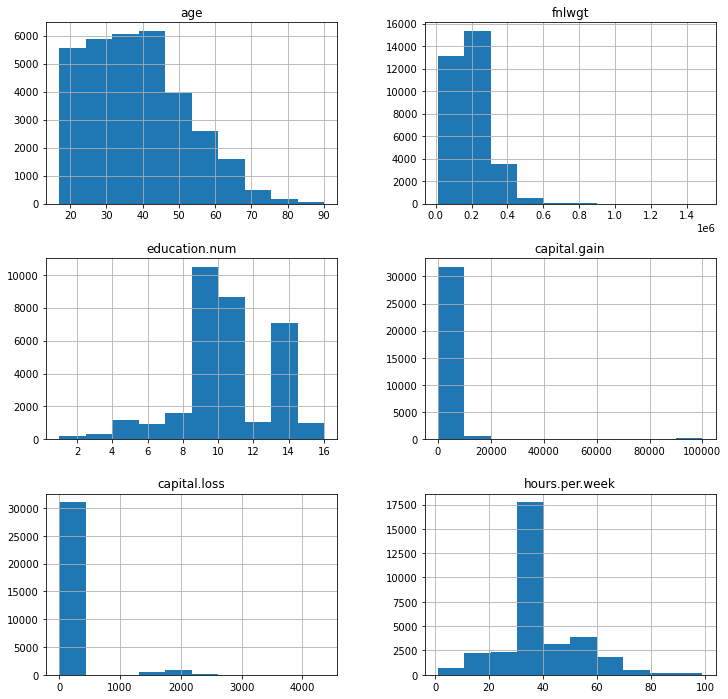

In [18]:
df[num_feature].hist(figsize=(12,12))
plt.show()

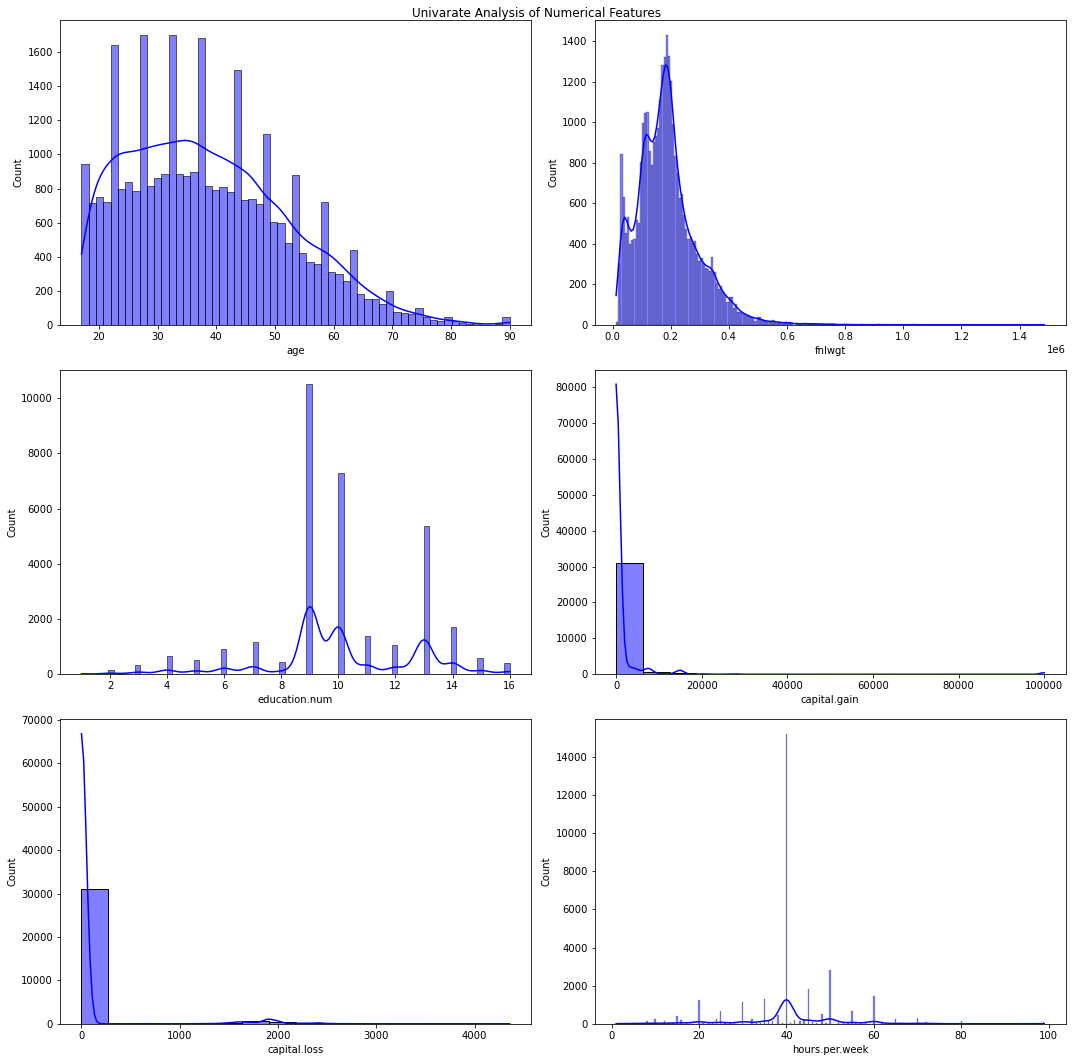

In [19]:
plt.figure(figsize=(15,15))
plt.suptitle('Univarate Analysis of Numerical Features')

for i in range(0,len(num_feature)):
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[num_feature[i]],color='b',kde=True)
    plt.xlabel(num_feature[i])
    plt.tight_layout()

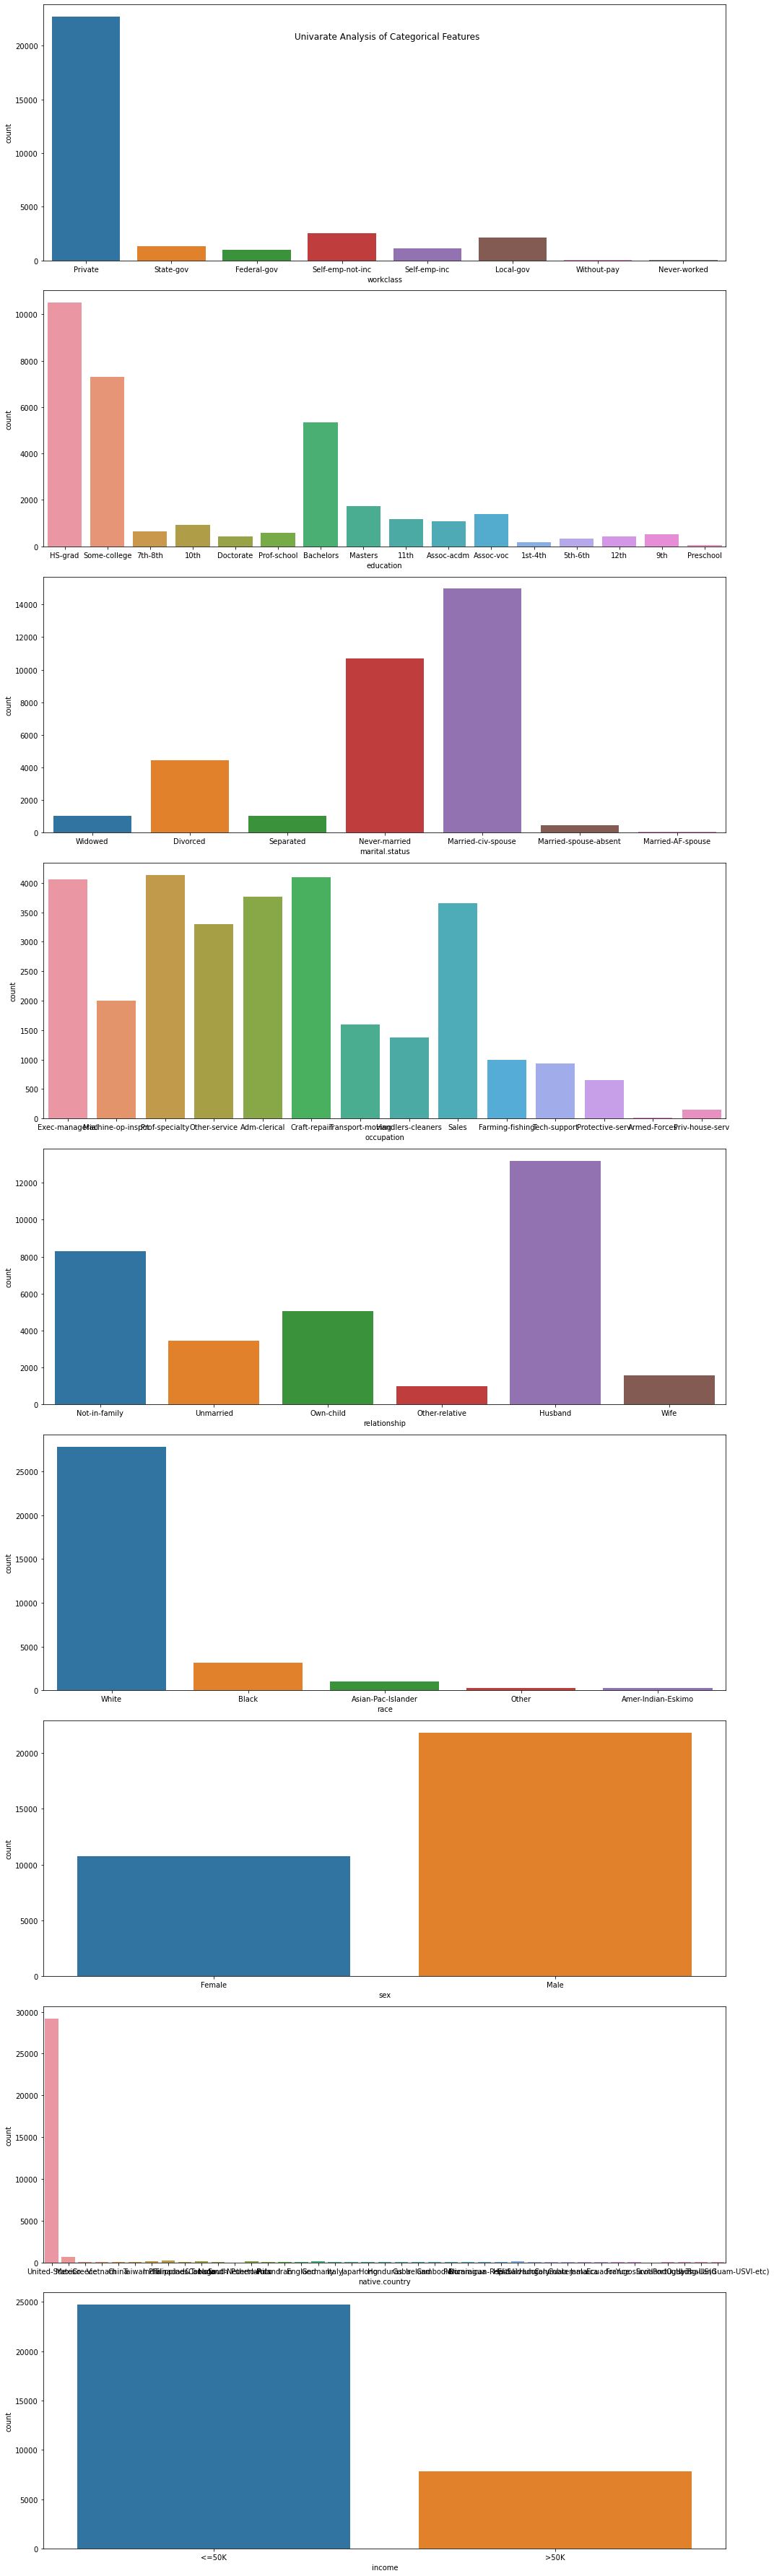

In [20]:
plt.figure(figsize=(15,50))
plt.suptitle('Univarate Analysis of Categorical Features')

for i in range(0,len(cat_feature)):
    plt.subplot(9,1,i+1)
    sns.countplot(x=df[cat_feature[i]])
    plt.xlabel(cat_feature[i])
    #plt.xticks(rotation=45)
    plt.tight_layout()

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [22]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

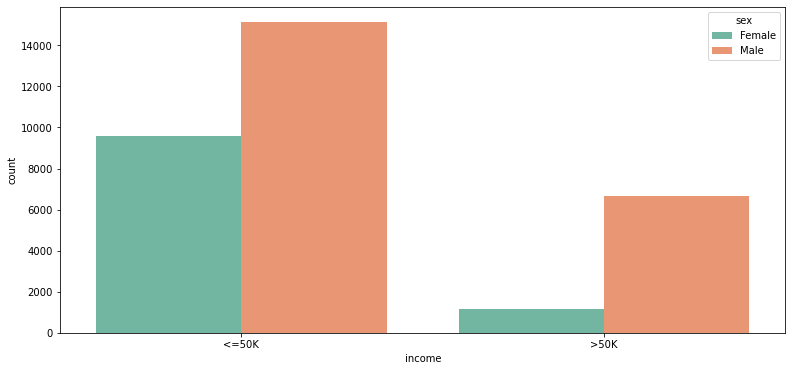

In [23]:
plt.subplots(figsize=(13,6))
sns.countplot(x='income',hue='sex',data=df,palette='Set2')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Machine-op-inspct'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Handlers-cleaners'),
  Text(8, 0, 'Sales'),
  Text(9, 0, 'Farming-fishing'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

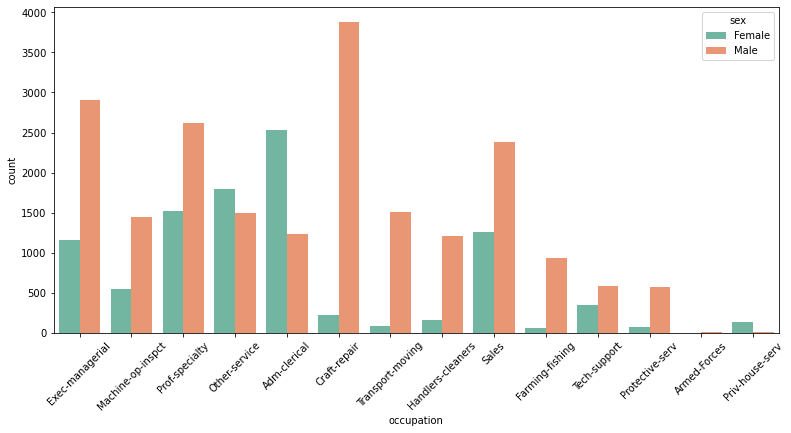

In [24]:
plt.subplots(figsize=(13,6))
sns.countplot(x='occupation',hue='sex',data=df,palette='Set2')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Machine-op-inspct'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Handlers-cleaners'),
  Text(8, 0, 'Sales'),
  Text(9, 0, 'Farming-fishing'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

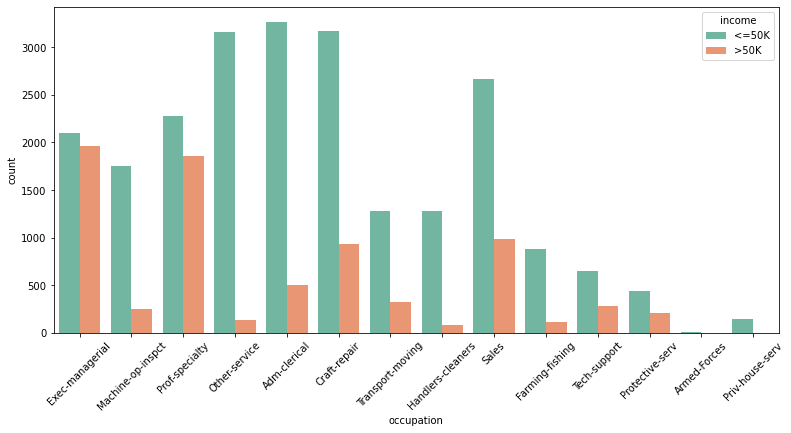

In [25]:
plt.subplots(figsize=(13,6))
sns.countplot(x='occupation',hue='income',data=df,palette='Set2')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, '7th-8th'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-acdm'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '1st-4th'),
  Text(12, 0, '5th-6th'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

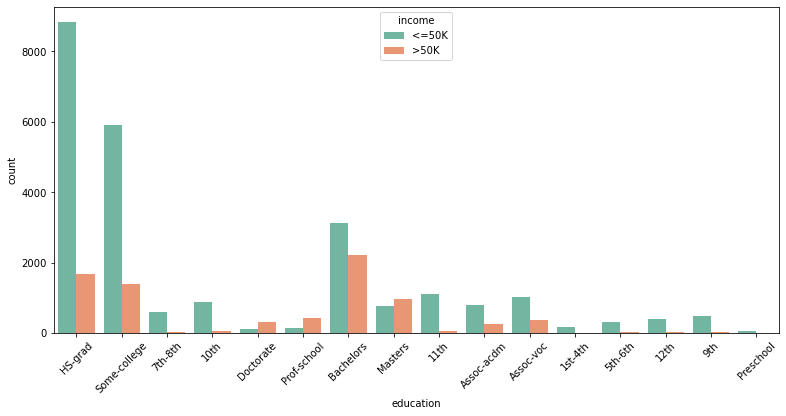

In [26]:
plt.subplots(figsize=(13,6))
sns.countplot(x='education',hue='income',data=df,palette='Set2')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, '7th-8th'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-acdm'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '1st-4th'),
  Text(12, 0, '5th-6th'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

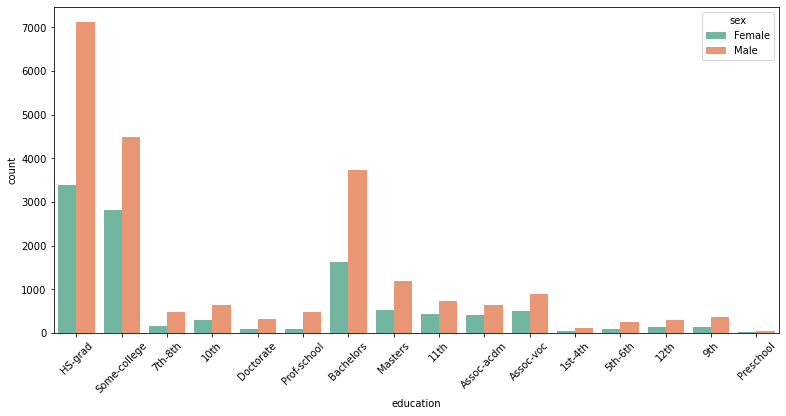

In [27]:
plt.subplots(figsize=(13,6))
sns.countplot(x='education',hue='sex',data=df,palette='Set2')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Tex

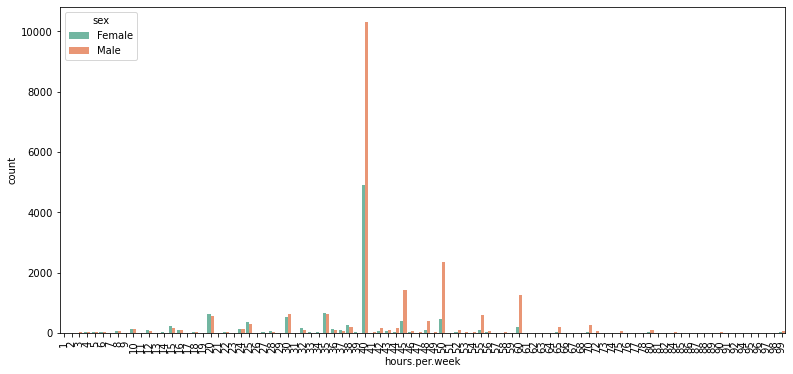

In [28]:
plt.subplots(figsize=(13,6))
sns.countplot(x='hours.per.week',hue='sex',data=df,palette='Set2')
plt.xticks(rotation=90)

In [29]:
counts=df.income.value_counts()
percentage=df.income.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
pd.DataFrame({"count": counts, '%':percentage})

,count,%
<=50K,24720,75.92%
>50K,7841,24.08%


In [30]:
counts

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [31]:
percentage

<=50K    75.92%
>50K     24.08%
Name: income, dtype: object

# DATA Prep

<AxesSubplot:ylabel='Count'>

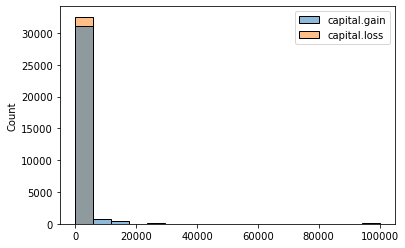

In [32]:
#capital.gain and capital.loss are both skewed
sns.histplot(df[['capital.gain','capital.loss']])

In [33]:
#logfunction applied on right skewed data
skew=['capital.gain','capital.loss']
df[skew]=df[skew].apply(lambda x: np.log(x+1))

In [34]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0.0,8.379539,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0.0,8.379539,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.000000,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.000000,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.000000,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.000000,40,United-States,<=50K


In [35]:
#drop fnlwgt and education
df.drop(['fnlwgt','education'],axis=1,inplace=True)

In [36]:
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0.0,8.379539,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0.0,8.379539,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.000000,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.000000,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.000000,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.000000,40,United-States,<=50K


In [37]:
df_drop=pd.DataFrame(df,columns=df.columns, index=df.index)

In [38]:
df_drop

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0.0,8.379539,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0.0,8.379539,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.000000,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.000000,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.000000,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.000000,40,United-States,<=50K


In [39]:
#deleting missing rows
df_drop.dropna(how='any',inplace=True)

In [40]:
df_drop

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0.0,8.235095,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0.0,8.235095,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.000000,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.000000,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.000000,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.000000,40,United-States,<=50K


In [41]:
X=df_drop.drop('income',axis=1)

In [42]:
X

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0.0,8.235095,45,United-States
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0.0,8.235095,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.000000,40,United-States
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.000000,38,United-States
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.000000,40,United-States
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.000000,40,United-States


In [43]:
y=pd.DataFrame(df_drop['income'],columns=['income'])

In [44]:
y

,income
1,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
...,...
32556,<=50K
32557,<=50K
32558,>50K
32559,<=50K


In [45]:
X.shape

(30162, 12)

In [46]:
y.shape

(30162, 1)

In [47]:
#one hot encoding
cat_X=X.select_dtypes(include=['object','bool']).columns

In [48]:
#categeroical columns from X dataset
cat_X

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [49]:
data1=X[cat_X]

In [50]:
data1

,workclass,marital.status,occupation,relationship,race,sex,native.country
1,Private,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
3,Private,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Separated,Prof-specialty,Own-child,White,Female,United-States
5,Private,Divorced,Other-service,Unmarried,White,Female,United-States
6,Private,Separated,Adm-clerical,Unmarried,White,Male,United-States
...,...,...,...,...,...,...,...
32556,Private,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
enc_missing=SimpleImputer(strategy="most_frequent",fill_value="missing")

In [52]:
enc_missing.fit(data1)
data1=pd.DataFrame(enc_missing.transform(data1),columns=data1.columns,index=data1.index)

In [53]:
data1.head(20)

,workclass,marital.status,occupation,relationship,race,sex,native.country
1,Private,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
3,Private,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Separated,Prof-specialty,Own-child,White,Female,United-States
5,Private,Divorced,Other-service,Unmarried,White,Female,United-States
6,Private,Separated,Adm-clerical,Unmarried,White,Male,United-States
7,State-gov,Never-married,Prof-specialty,Other-relative,White,Female,United-States
8,Federal-gov,Divorced,Prof-specialty,Not-in-family,White,Female,United-States
10,Private,Divorced,Prof-specialty,Unmarried,Black,Female,United-States
11,Self-emp-not-inc,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
12,Private,Widowed,Other-service,Not-in-family,White,Female,United-States


In [54]:
#performing onehotencoder
OHE=OneHotEncoder(sparse=False,handle_unknown='ignore')
enc_X=OHE.fit_transform(data1)
col_name=OHE.get_feature_names_out(['workclass','marital.status','occupation','relationship','race','sex','native.country'])
encoded_X=pd.DataFrame(enc_X,columns=col_name,index=data1.index)

In [55]:
encoded_X.head(20)

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
encoded_X.shape

(30162, 82)

In [57]:
num_X=X.select_dtypes(include=['int64','float64']).columns
dat=pd.DataFrame(X[num_X],columns=['age','education.num','capital.gain','capital.loss','hours.per.week'],index=data1.index)

In [58]:
finalX=pd.concat([dat,encoded_X],axis=1)

In [59]:
finalX

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,9,0.0,8.379539,18,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,54,4,0.0,8.268988,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,41,10,0.0,8.268988,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,34,9,0.0,8.235095,45,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,38,6,0.0,8.235095,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0.0,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,27,12,0.0,0.000000,38,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,40,9,0.0,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,58,9,0.0,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
finalX.shape, y.shape

((30162, 87), (30162, 1))

In [72]:
 from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.33, random_state=42)

In [76]:
X_train

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
30276,28,9,0.000000,0.00000,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8830,32,9,0.000000,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3703,32,9,8.040447,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13014,50,9,0.000000,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2885,38,10,8.895493,0.00000,43,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32173,22,10,0.000000,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5779,50,14,0.000000,0.00000,38,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
908,25,13,0.000000,7.53743,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17031,35,13,0.000000,0.00000,50,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
#scaling numerical features for train dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
num_X=X_train.select_dtypes(include=['int64','float64']).columns
data=X_train[num_X]
scaler=MinMaxScaler()
scaled_X_train=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [78]:
data

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
30276,28,9,0.000000,0.00000,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8830,32,9,0.000000,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3703,32,9,8.040447,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13014,50,9,0.000000,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2885,38,10,8.895493,0.00000,43,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32173,22,10,0.000000,0.00000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5779,50,14,0.000000,0.00000,38,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
908,25,13,0.000000,7.53743,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17031,35,13,0.000000,0.00000,50,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
scaled_X_train

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.150685,0.533333,0.000000,0.000000,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.205479,0.533333,0.000000,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.205479,0.533333,0.698384,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.452055,0.533333,0.000000,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.287671,0.600000,0.772653,0.000000,0.428571,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20203,0.068493,0.600000,0.000000,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20204,0.452055,0.866667,0.000000,0.000000,0.377551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20205,0.109589,0.800000,0.000000,0.899504,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20206,0.246575,0.800000,0.000000,0.000000,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
#label encoding for y_train
from sklearn.preprocessing import LabelEncoder
y_train=pd.DataFrame(LabelEncoder().fit_transform(y_train),columns=y_train.columns)

C:\Users\shara\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
y_train

,income
0,0
1,0
2,1
3,0
4,1
...,...
20203,0
20204,0
20205,0
20206,0


In [82]:
#scaling numerical features of testing dataset
num_X=X_test.select_dtypes(include=['int64','float64']).columns
data=X_test[num_X]
scaler=MinMaxScaler()
scaled_X_test=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [83]:
data

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
243,45,12,0.000000,7.640604,40,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26866,22,9,0.000000,0.000000,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19170,39,13,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13458,35,15,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9601,40,13,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,40,12,9.617471,0.000000,50,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32437,61,7,0.000000,0.000000,30,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14807,28,9,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16084,68,9,0.000000,0.000000,24,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
scaled_X_test

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.383562,0.733333,0.000000,0.92781,0.397959,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.068493,0.533333,0.000000,0.00000,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.301370,0.800000,0.000000,0.00000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.246575,0.933333,0.000000,0.00000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.315068,0.800000,0.000000,0.00000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,0.315068,0.733333,0.835363,0.00000,0.500000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9950,0.602740,0.400000,0.000000,0.00000,0.295918,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9951,0.150685,0.533333,0.000000,0.00000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9952,0.698630,0.533333,0.000000,0.00000,0.234694,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
#encoding for test dataset
y_test=pd.DataFrame(LabelEncoder().fit_transform(y_test),columns=y_test.columns)

C:\Users\shara\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
y_test

,income
0,0
1,0
2,0
3,1
4,1
...,...
9949,1
9950,0
9951,0
9952,0


In [87]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(scaled_X_train,y_train)

C:\Users\shara\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_pred=log_reg.predict(scaled_X_test)

In [106]:
y_pred
y_finalpred=y_pred

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[6834,  612],
       [1010, 1498]], dtype=int64)

In [91]:
TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]

In [92]:
TP,FP,FN,TN

(6834, 612, 1010, 1498)

In [93]:
accuracy_score(y_test,y_pred)

0.8370504319871408

In [94]:
Precision= TP/(TP+FP)
Precision

0.9178082191780822

In [95]:
Recall=TP/(TP+FN)
Recall

0.8712391636919938

In [96]:

F1_score= 2*(Precision*Recall)/(Precision+Recall)
F1_score

0.8939175931981687

# SVM Kernel Application

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier= SVC(kernel='linear')
classifier.fit(scaled_X_train,y_train)
y_pred=classifier.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

C:\Users\shara\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8382559774964838

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier= SVC(kernel='poly')
classifier.fit(scaled_X_train,y_train)
y_pred=classifier.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

C:\Users\shara\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8333333333333334

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier= SVC(kernel='rbf')
classifier.fit(scaled_X_train,y_train)
y_pred=classifier.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

C:\Users\shara\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8323287120755475

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier= SVC(kernel='sigmoid')
classifier.fit(scaled_X_train,y_train)
y_pred=classifier.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

C:\Users\shara\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7726542093630702

In [108]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,y_finalpred)

In [109]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

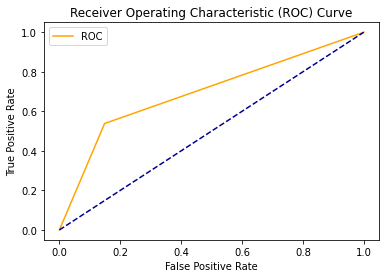

In [110]:
plot_roc_curve(fpr,tpr)